Do vaccination numbers affect total number of cases?
Does GDP or poverty levels affect total number of cases?
Does age play a roll?
Smokers?
Any other factors? 

In [77]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
# read the csv file

data = pd.read_csv('covid-data.csv')

In [79]:
data.shape[0]

121034

In [80]:
data.shape[1]

65

In [81]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121029,ZWE,Africa,Zimbabwe,2021-09-29,130485.0,213.0,240.143,4616.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121030,ZWE,Africa,Zimbabwe,2021-09-30,130820.0,335.0,240.857,4623.0,7.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121031,ZWE,Africa,Zimbabwe,2021-10-01,131028.0,208.0,270.571,4624.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121032,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121033,ZWE,Africa,Zimbabwe,2021-10-03,131129.0,35.0,214.857,4627.0,2.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [82]:
# listing column names

data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Do vaccination numbers affect total number of cases?

To focus my analysis I will be working on the continents of Asia and South America.
I will begin with Asia.

In [83]:
# finding the continent naming convetion

data.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [84]:
# filter data 
    
data1 = data[['continent', 'location', 'total_cases','total_vaccinations', 'population']]

In [85]:
# drop nan values

data1 = data1.dropna(axis=0)

In [86]:
# verify drop

data1.isnull().sum()

continent             0
location              0
total_cases           0
total_vaccinations    0
population            0
dtype: int64

In [87]:
data1.head()

,continent,location,total_cases,total_vaccinations,population
364,Asia,Afghanistan,55617.0,0.0,39835428.0
370,Asia,Afghanistan,55714.0,8200.0,39835428.0
386,Asia,Afghanistan,55995.0,54000.0,39835428.0
408,Asia,Afghanistan,56873.0,120000.0,39835428.0
423,Asia,Afghanistan,58312.0,240000.0,39835428.0


In [88]:
# getting data for Asia

asiaData=data1[data1['continent'] == 'Asia']

In [89]:
asiaData.head()

,continent,location,total_cases,total_vaccinations,population
364,Asia,Afghanistan,55617.0,0.0,39835428.0
370,Asia,Afghanistan,55714.0,8200.0,39835428.0
386,Asia,Afghanistan,55995.0,54000.0,39835428.0
408,Asia,Afghanistan,56873.0,120000.0,39835428.0
423,Asia,Afghanistan,58312.0,240000.0,39835428.0


In [90]:
asiaData_grouped = asiaData.groupby('location').sum()

In [91]:
# Aggregate asiaData

asiaData_agg = asiaData.groupby('location').agg({'total_cases': 'sum', 'total_vaccinations': 'sum', 'population': 'sum'})

In [92]:
# correlation


cmatrixAsia = asiaData_agg.corr()

cmatrixAsia

,total_cases,total_vaccinations,population
total_cases,1.000000,0.274179,0.738645
total_vaccinations,0.274179,1.000000,0.837451
population,0.738645,0.837451,1.000000


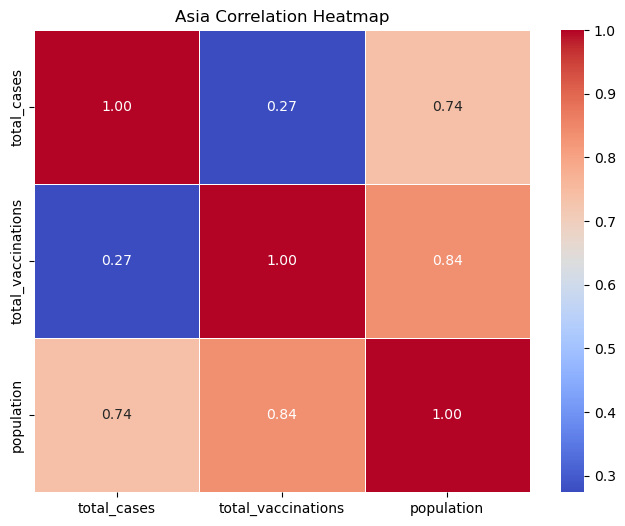

In [93]:
# corelation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cmatrixAsia, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Asia Correlation Heatmap')
plt.show()

## South America

In [94]:
# get data for just South America

saData=data1[data1['continent'] == 'South America']
saData.head()

,continent,location,total_cases,total_vaccinations,population
4678,South America,Argentina,1602163.0,700.0,45605823.0
4680,South America,Argentina,1625514.0,32013.0,45605823.0
4684,South America,Argentina,1648940.0,39599.0,45605823.0
4688,South America,Argentina,1703352.0,107542.0,45605823.0
4693,South America,Argentina,1757429.0,166833.0,45605823.0


In [95]:
# aggregate SA data

saData_agg = saData.groupby('location').agg({'total_cases': 'sum', 'total_vaccinations': 'sum', 'population': 'sum'})

In [96]:
# correlation

cmatrixSA = saData_agg.corr()

cmatrixSA

,total_cases,total_vaccinations,population
total_cases,1.000000,0.984755,0.996982
total_vaccinations,0.984755,1.000000,0.984352
population,0.996982,0.984352,1.000000


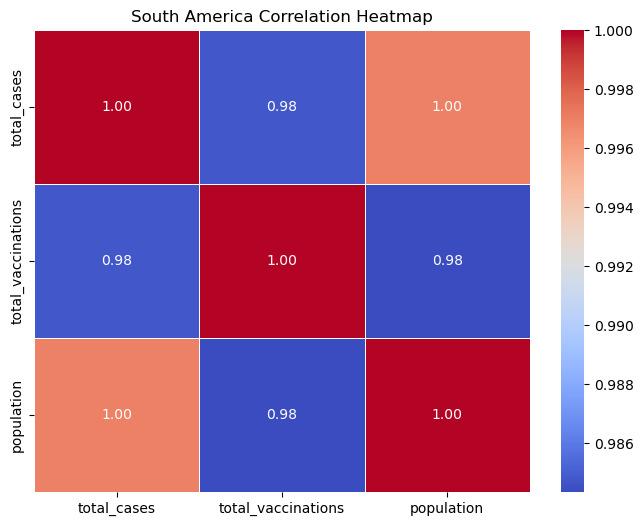

In [97]:
# corelation heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cmatrixSA, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('South America Correlation Heatmap')
plt.show()

# Correlation for Asia & South America

My analsis found that there is not a correlation in Asia,
there is a strong correlation in South America.

# Does GDP affect total number of cases?

For GDP I focused only on Asia

In [98]:
# Get data 

data2 = data[['continent', 'location', 'total_cases', 'gdp_per_capita', 'extreme_poverty']]
data2.head()

,continent,location,total_cases,gdp_per_capita,extreme_poverty
0,Asia,Afghanistan,5.0,1803.987,NaN
1,Asia,Afghanistan,5.0,1803.987,NaN
2,Asia,Afghanistan,5.0,1803.987,NaN
3,Asia,Afghanistan,5.0,1803.987,NaN
4,Asia,Afghanistan,5.0,1803.987,NaN


In [99]:
asiaGDPData = data2.dropna(axis=0)

In [100]:
# Asia data

asiaGDPData = asiaGDPData[asiaGDPData['continent'] == 'Asia'].sort_values('continent')

In [101]:
asiagdpHigh = asiaGDPData.drop('continent', axis=1)
asiagdpHigh

,location,total_cases,gdp_per_capita,extreme_poverty
4957,Armenia,1.0,8787.580,1.8
83617,Pakistan,579973.0,5034.708,4.0
83618,Pakistan,581365.0,5034.708,4.0
83619,Pakistan,582528.0,5034.708,4.0
83620,Pakistan,583916.0,5034.708,4.0
...,...,...,...,...
54018,Israel,54440.0,33132.320,0.5
54019,Israel,56484.0,33132.320,0.5
54020,Israel,58474.0,33132.320,0.5
66560,Malaysia,10.0,26808.164,0.1


In [102]:
# Display 10 largest 'gdp_per_capita' grouped by 'location'
asiagdpHigh = asiagdpHigh.groupby('location').max().nlargest(10, 'gdp_per_capita')
asiagdpHigh

,total_cases,gdp_per_capita,extreme_poverty
location,,,
South Korea,319777.0,35938.374,0.2
Israel,1290129.0,33132.320,0.5
Malaysia,2277565.0,26808.164,0.1
Turkey,7208851.0,25129.341,0.2
Kazakhstan,968975.0,24055.588,0.1
Iran,5624128.0,19082.620,0.2
Thailand,1637432.0,16277.671,0.1
Iraq,2009678.0,15663.986,2.5
China,96329.0,15308.712,0.7


In [103]:
# correlation for highest GDP

asiaGDPDataCorr = asiagdpHigh.corr()
asiaGDPDataCorr

,total_cases,gdp_per_capita,extreme_poverty
total_cases,1.000000,0.028691,-0.132939
gdp_per_capita,0.028691,1.000000,-0.354536
extreme_poverty,-0.132939,-0.354536,1.000000


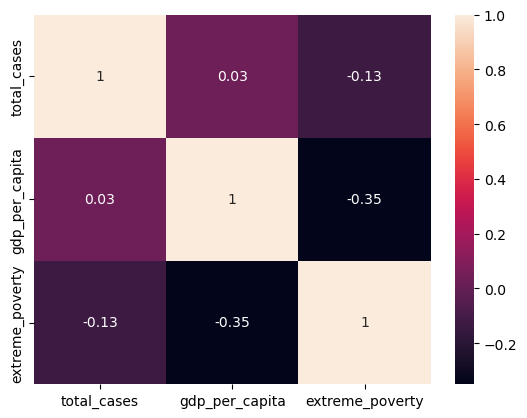

In [104]:
# corelation heatmap

asiagdpHighCorrMatrix= asiaGDPDataCorr.round(2)
sns.heatmap(asiagdpHighCorrMatrix, annot=True)
plt.show()

In [105]:
# find 10 lowest GDP per capita countries in Asia

asiagdpLow = asiaGDPData.groupby('location').min().nsmallest(10, 'gdp_per_capita')
asiagdpLow

,continent,total_cases,gdp_per_capita,extreme_poverty
location,,,,
Yemen,Asia,1.0,1479.147,18.8
Nepal,Asia,1.0,2442.804,15.0
Tajikistan,Asia,15.0,2896.913,4.8
Kyrgyzstan,Asia,3.0,3393.474,1.4
Bangladesh,Asia,3.0,3523.984,14.8
Palestine,Asia,4.0,4449.898,1.0
Pakistan,Asia,2.0,5034.708,4.0
Myanmar,Asia,8.0,5591.597,6.4
Vietnam,Asia,2.0,6171.884,2.0


In [106]:
asiagdpLow.drop('continent', axis=1, inplace=True)
asiagdpLow

,total_cases,gdp_per_capita,extreme_poverty
location,,,
Yemen,1.0,1479.147,18.8
Nepal,1.0,2442.804,15.0
Tajikistan,15.0,2896.913,4.8
Kyrgyzstan,3.0,3393.474,1.4
Bangladesh,3.0,3523.984,14.8
Palestine,4.0,4449.898,1.0
Pakistan,2.0,5034.708,4.0
Myanmar,8.0,5591.597,6.4
Vietnam,2.0,6171.884,2.0


In [107]:
# correlation 10 lowest GDP

asiagdpLowCorr=asiagdpLow.corr()
print(asiagdpLowCorr)

                 total_cases  gdp_per_capita  extreme_poverty
total_cases         1.000000       -0.058821        -0.339603
gdp_per_capita     -0.058821        1.000000        -0.193039
extreme_poverty    -0.339603       -0.193039         1.000000


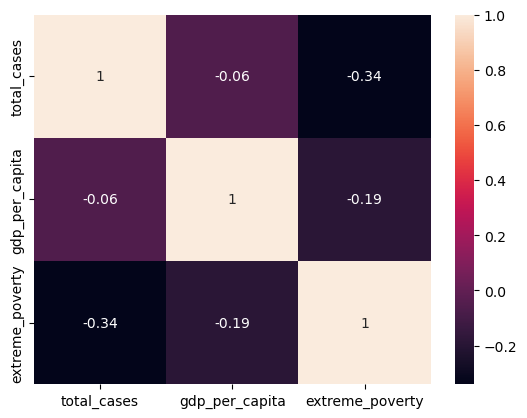

In [108]:
# matrix

asiagdpLowCorrMatrix= asiagdpLowCorr.round(2)
sns.heatmap(asiagdpLowCorrMatrix, annot=True)
plt.show()

# Does poverty levels affect total number of cases?

for Poverty Levels I focused on South America

In [109]:
# South America data

sapLData=data2.loc[data2['continent'] == 'South America']
sapLData=sapLData.drop(['continent'], axis=1)
sapLData=sapLData.groupby('location')[['total_cases', 'gdp_per_capita', 'extreme_poverty']].mean().round(1)

In [111]:
# highest poverty level

saHighPl=sapLData.nlargest(n=5, columns=['extreme_poverty'])
print(saHighPl)

          total_cases  gdp_per_capita  extreme_poverty
location                                              
Bolivia      209729.0          6885.8              7.1
Colombia    1893749.8         13254.9              4.5
Ecuador      232988.1         10581.9              3.6
Peru        1087812.1         12236.7              3.5
Brazil      8775747.3         14103.5              3.4


In [113]:
# correlation

saHighPlCorr=saHighPl.corr()
print(saHighPlCorr)

                 total_cases  gdp_per_capita  extreme_poverty
total_cases         1.000000        0.652642        -0.418367
gdp_per_capita      0.652642        1.000000        -0.831895
extreme_poverty    -0.418367       -0.831895         1.000000


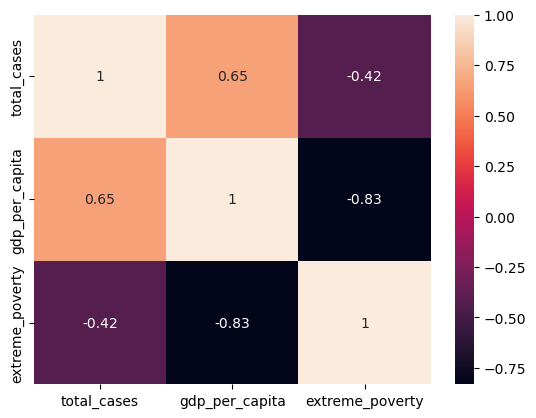

In [114]:
# corelation matrix

saHighPLMatrix = saHighPlCorr.round(2)
sns.heatmap(saHighPLMatrix, annot=True)
plt.show()

In [115]:
# lowest poverty levels

saLowPl=sapLData.nsmallest(n=5, columns=['extreme_poverty'])
print(saLowPl)

           total_cases  gdp_per_capita  extreme_poverty
location                                               
Uruguay       112792.6         20551.4              0.1
Argentina    1920715.6         18933.9              0.6
Chile         738092.7         22767.0              1.3
Paraguay      163095.5          8827.0              1.7
Brazil       8775747.3         14103.5              3.4


In [116]:
# correlation

saLowPlCorr=saLowPl.corr()
print(saLowPlCorr)

                 total_cases  gdp_per_capita  extreme_poverty
total_cases         1.000000       -0.229417         0.838898
gdp_per_capita     -0.229417        1.000000        -0.529234
extreme_poverty     0.838898       -0.529234         1.000000


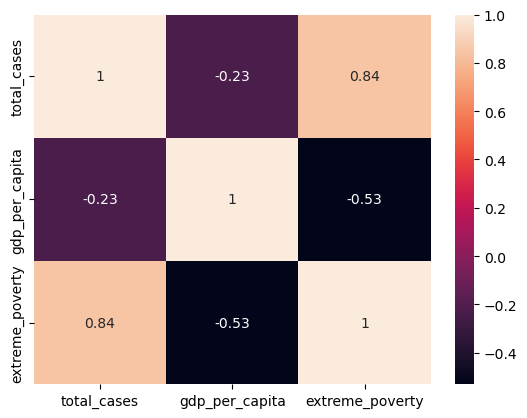

In [117]:
# corelation matrix

saLowPLMatrix = saLowPlCorr.round(2)
sns.heatmap(saLowPLMatrix, annot=True)
plt.show()

# Does age play a roll?

For this section I considered South America and Asia

In [62]:
data3 = data[['continent', 'location', 'total_cases', 'aged_65_older', 'median_age']]

## South America 

I looked at the ten countries with the highest median age

In [63]:
# South America data

saAgeData=data3.loc[data3['continent'] == 'South America']
saAgeData=saAgeData.drop(['continent'], axis=1)
saAgeData=saAgeData.groupby('location')[['total_cases', 'aged_65_older', 'median_age']].mean().round(1)

In [64]:
# Highest 10 countries 

saAgeHigh=saAgeData.nlargest(n=10, columns=['median_age'])
print(saAgeHigh)

           total_cases  aged_65_older  median_age
location                                         
Uruguay       112792.6           14.7        35.6
Chile         738092.7           11.1        35.4
Brazil       8775747.3            8.6        33.5
Colombia     1893749.8            7.6        32.2
Argentina    1920715.6           11.2        31.9
Suriname        9676.8            6.9        29.6
Peru         1087812.1            7.2        29.1
Venezuela     131151.6            6.6        29.0
Ecuador       232988.1            7.1        28.1
Paraguay      163095.5            6.4        26.5


In [65]:
# correlation

saAgeHighCorr=saAgeHigh.corr()
print(saAgeHighCorr)

               total_cases  aged_65_older  median_age
total_cases       1.000000       0.015561    0.330814
aged_65_older     0.015561       1.000000    0.829356
median_age        0.330814       0.829356    1.000000


<Axes: xlabel='median_age', ylabel='total_cases'>

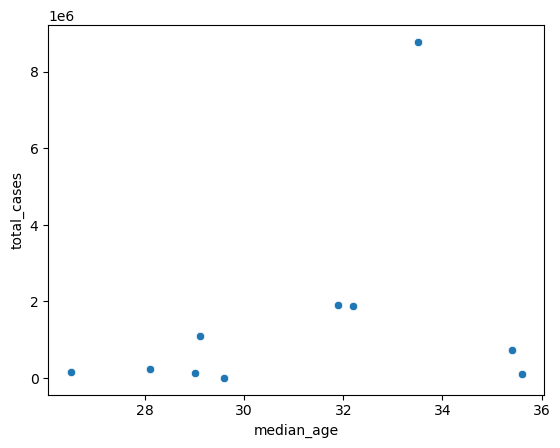

In [66]:
# scatter plot

sns.scatterplot(x='median_age', y='total_cases', data=saAgeHigh)

## Asia

for Asia I looked at the 10 lowest median age countries

In [67]:
# Asia data

asiaAgeData=data3.loc[data3['continent'] == 'Asia']
asiaAgeData=asiaAgeData.drop(['continent'], axis=1)
asiaAgeData=asiaAgeData.groupby('location')[['total_cases', 'aged_65_older', 'median_age']].mean().round(1)

In [68]:
# Lowest 10 countries 

asiaLowAgeData=saAgeData.nsmallest(n=10, columns=['median_age'])
print(asiaLowAgeData)

           total_cases  aged_65_older  median_age
location                                         
Bolivia       209729.0            6.7        25.4
Guyana          8787.7            5.3        26.3
Paraguay      163095.5            6.4        26.5
Ecuador       232988.1            7.1        28.1
Venezuela     131151.6            6.6        29.0
Peru         1087812.1            7.2        29.1
Suriname        9676.8            6.9        29.6
Argentina    1920715.6           11.2        31.9
Colombia     1893749.8            7.6        32.2
Brazil       8775747.3            8.6        33.5


In [69]:
# correlation

saAgeLowCorr=asiaLowAgeData.corr()
print(saAgeLowCorr)

               total_cases  aged_65_older  median_age
total_cases       1.000000       0.469674    0.725111
aged_65_older     0.469674       1.000000    0.713593
median_age        0.725111       0.713593    1.000000


<Axes: xlabel='median_age', ylabel='total_cases'>

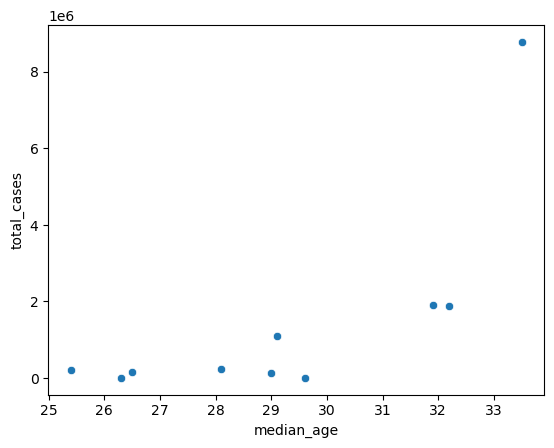

In [70]:
# scatter plot

sns.scatterplot(x='median_age', y='total_cases', data=asiaLowAgeData)

# Smokers?

In [119]:
data4 = data[['continent', 'location', 'total_cases', 'male_smokers', 'female_smokers']]

## South America



In [120]:
# South America data

saSmokeData=data4[data4['continent'] == 'South America']
saSmokeData=saSmokeData.drop(['continent'], axis=1)
saSmokeData=saSmokeData.groupby('location')[['total_cases', 'male_smokers', 'female_smokers']].mean().round(1)

In [121]:
# Highest 5 countries (Male)

saSmokeDataM = saSmokeData.sort_values(by='male_smokers', ascending=False).head(5)
saSmokeDataM

,total_cases,male_smokers,female_smokers
location,,,
Suriname,9676.8,42.9,7.4
Chile,738092.7,41.5,34.2
Argentina,1920715.6,27.7,16.2
Paraguay,163095.5,21.6,5.0
Uruguay,112792.6,19.9,14.0


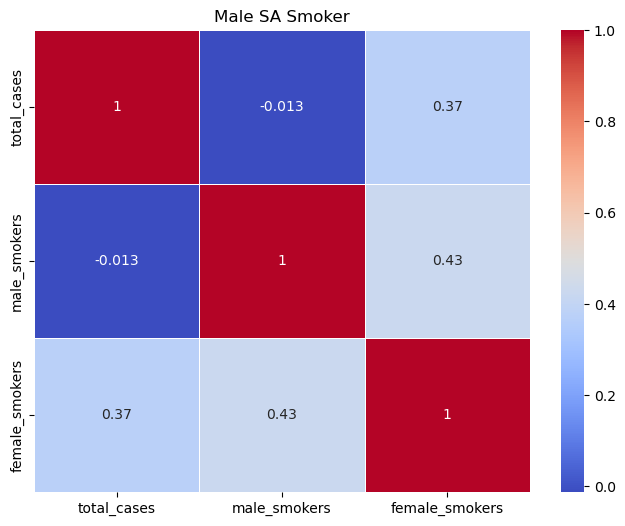

In [122]:
# Correlation Heatmap Male

saSmokeDataM_corr = saSmokeDataM.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(saSmokeDataM_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Male SA Smoker')
plt.show()

In [76]:
# Highest 5 countries (Female)

saSmokeDataF = asiaSmokeData.sort_values(by='female_smokers', ascending=False).head(5)
saSmokeDataF

,total_cases,male_smokers,female_smokers
location,,,
Chile,738092.7,41.5,34.2
Argentina,1920715.6,27.7,16.2
Uruguay,112792.6,19.9,14.0
Brazil,8775747.3,17.9,10.1
Suriname,9676.8,42.9,7.4


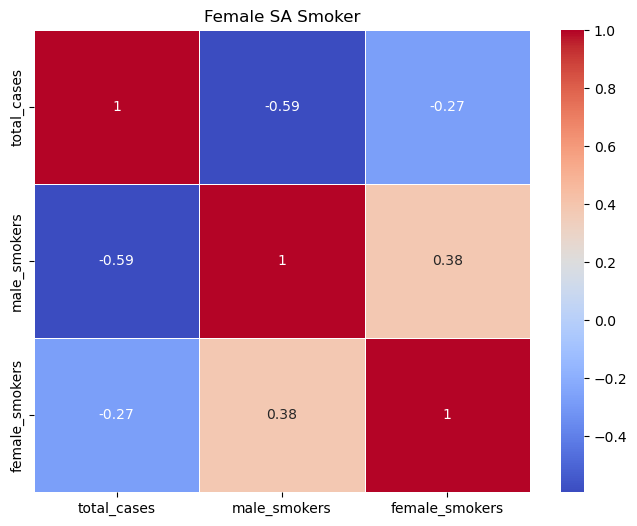

In [77]:
# Correlation heatmap Female

saSmokeDataF_corr = saSmokeDataF.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(saSmokeDataF_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Female SA Smoker')
plt.show()

In [126]:
# Asia data

asiaSmokeData=data4[data4['continent'] == 'Asia']
asiaSmokeData=asiaSmokeData.drop(['continent'], axis=1)
asiaSmokeData=asiaSmokeData.groupby('location')[['total_cases', 'male_smokers', 'female_smokers']].mean().round(1)

In [127]:
# Highest 5 countries (Male)

asiaSmokeDataM = asiaSmokeData.sort_values(by='male_smokers', ascending=False).head(5)
asiaSmokeDataM

,total_cases,male_smokers,female_smokers
location,,,
Timor,3182.0,78.1,6.3
Indonesia,1153609.5,76.1,2.8
Georgia,186090.6,55.5,5.3
Maldives,26609.8,55.0,2.1
Armenia,124356.1,52.1,1.5


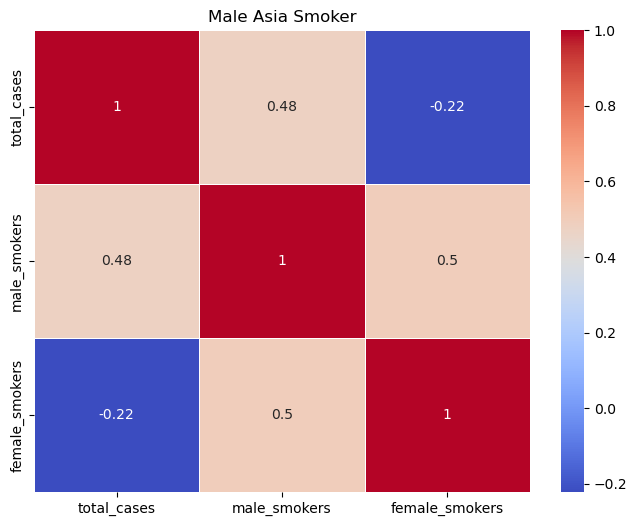

In [129]:
# Correlation Heatmap Male

asiaSmokeDataMcorr = asiaSmokeDataM.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(asiaSmokeDataMcorr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Male Asia Smoker')
plt.show()

In [130]:
# Highest 5 countries (Female)

asiaSmokeDataF = saSmokeData.sort_values(by='female_smokers', ascending=False).head(5)
asiaSmokeDataF

,total_cases,male_smokers,female_smokers
location,,,
Chile,738092.7,41.5,34.2
Argentina,1920715.6,27.7,16.2
Uruguay,112792.6,19.9,14.0
Brazil,8775747.3,17.9,10.1
Suriname,9676.8,42.9,7.4


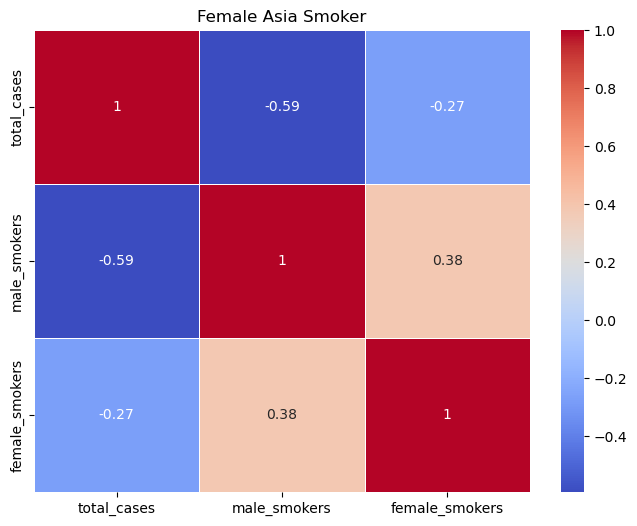

In [132]:
# Correlation Heatmap Male

asiaSmokeDataFcorr = asiaSmokeDataF.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(asiaSmokeDataFcorr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Female Asia Smoker')
plt.show()

# Human Development Index

Is there any correlation between total cases and HDI?

In [134]:
# Human Development Index Data

# Create dataset using 'population', 'total_cases', 'human_development_index' and group by the 'continent' column
hdIdata = data[['continent', 'population', 'total_cases', 'human_development_index']].groupby('continent').mean().reset_index()

# Sort the dataset by the lowest value of 'total_cases'
hdIdata = hdIdata.sort_values(by='human_development_index')

hdIdata

,continent,population,total_cases,human_development_index
0,Africa,2.572629e+07,5.697009e+04,0.561715
4,Oceania,4.518800e+06,5.668815e+03,0.731996
1,Asia,1.010347e+08,5.274810e+05,0.741945
3,North America,2.351530e+07,9.538055e+05,0.757381
5,South America,3.619773e+07,1.288201e+06,0.764339
2,Europe,1.599158e+07,5.149735e+05,0.880491


In [135]:
# drop nan values

hdIdata = hdIdata.dropna(axis=0)

In [136]:
hdIdata.drop('continent', axis=1, inplace=True)
hdIdata

,population,total_cases,human_development_index
0,2.572629e+07,5.697009e+04,0.561715
4,4.518800e+06,5.668815e+03,0.731996
1,1.010347e+08,5.274810e+05,0.741945
3,2.351530e+07,9.538055e+05,0.757381
5,3.619773e+07,1.288201e+06,0.764339
2,1.599158e+07,5.149735e+05,0.880491


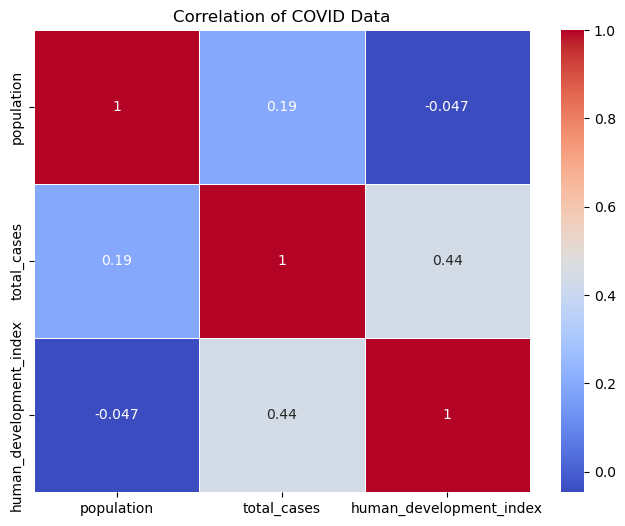

In [137]:
# Create a heatmap

hdIdataCmatrix = hdIdata.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(hdIdataCmatrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of COVID Data')
plt.show()